# <U> Practical Tutorial PCA</U>:

- We are going to use Principal Component Analysis to reduce the dimensionality of a dataset. 


- Remember, three vital packages will be used throughout: 
    - Pandas for data wrangling
    - Matplotlib for plotting
    - Sklean for machine learning



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Before you begin

- Make sure you know the full path to tumour_gene_data.csv and tumour_gene_labels.csv for your own computer.

In [3]:
# Upload the data
tumour_gene_data = pd.read_csv('/Users/georgegifford/Dropbox/Teaching/PCA_practical/tumour_gene_data.csv', index_col=0)
tumour_labels = pd.read_csv('/Users/georgegifford/Dropbox/Teaching/PCA_practical/tumour_gene_labels.csv', index_col=0)

- When you've uploaded the data, quickly check the dimensionality of the dataset.

In [4]:
# Check the dimensionality
tumour_gene_data.shape

(277, 20531)

- As you can see we have 277 instances and 20531 features.

# <U> Part 1: Dimensionality reduction with PCA</U>:

- There are several ways to reduce the number of features in a dataset. One tool that is often used for highly dimensional datasets is Principal Comonponenet Analysis (PCA). Here we will apply PCA to our gene data.
- First we should to scale our data to mean = 0 and variance = 1.

### Task 1: Scale the data using the sklearn StandardScaler() function and run a PCA model

In [5]:
# Your code here!
tumour_gene_data_scaled = StandardScaler().fit_transform(tumour_gene_data)

- Now lets apply PCA to our dataset to return a dataset containing the PCA components.

In [6]:
# Create the PCA model with the desired number of components
pca = PCA(n_components=100)

# Apply PCA to the data and return the computed principal components
tumour_gene_data_PCA = pca.fit_transform(tumour_gene_data_scaled)

- Now let's check the dimensionality of the PCA transformed data.

In [7]:
# Your code here!
# Check the PCA data dimensionality
tumour_gene_data_PCA.shape

(277, 100)

- After applying PCA it is important to check how much variance is being explained by our prinicipal component loadings.
- Let's have a look at this with a simple bar chart and the sum of variance explained across all principal components.

Total variance explained =  82.02844020536446 %


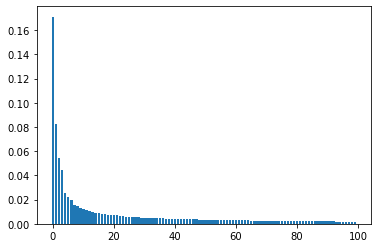

In [8]:
expl_var = pca.explained_variance_ratio_
plt.bar(list(range(100)), expl_var)
print('Total variance explained = ', sum(expl_var)*100, '%')

##### <font color='blue'>Question: Why is it important to scale our data before applying PCA?</font>
##### <font color='red'>PCA finds prinicpal components that are in the direction of maximum variance. Without scaling our data it is possible that 1 unit of variance in one feature would be different to 1 unit of variance in another feautre, which could bias our resulting principal components.</font>
##### <font color='blue'>Question: What does the distribution of principal components show?</font>
##### <font color='red'>The distribution of principal components shown above tells us that the first few principal components contain most of the variance.</font> 
##### 

### Task 2: Change the number of components included in the PCA and see how this changes the amount of variance explained

In [14]:
# Your code here!
# Run a PCA with a different number of components and return the total variance explained (try between 2 and 300)
pca = PCA(n_components= 20)
tumour_gene_data_PCA = pca.fit_transform(tumour_gene_data_scaled)
expl_var = pca.explained_variance_ratio_
print('Total variance explained = ', sum(expl_var)*100, '%')

Total variance explained =  55.50151000455641 %


##### <font color='blue'>Question: how many principal componenets can you create from the data?</font>
##### <font color='red'>The maximum number of prinicipal components is the maximum number of features or sample size (whichever is smaller).</font> 
##### 

### Task 3: Having the data in lower dimensional space means we can plot it in 2d. Take the first two components of any PCA reduced dataset and see how they seperate into the two types of tumour with a scatter plot

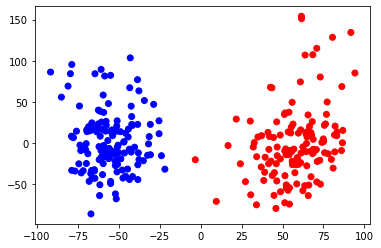

In [15]:
# Your code here! 
# Hint, here is a vector of colours that match the tumour labels
label_colours = tumour_labels.Class.map({'PRAD': 'red', 'LUAD':'blue'})

# Create a 2d scatterplot with one principal component on each axis and points coloured according
# tumour labels
pc1 = tumour_gene_data_PCA[:,0]
pc2 = tumour_gene_data_PCA[:,1]
plt.scatter(pc1, pc2, c = label_colours)

##### <font color='blue'>Question: do you think a classifier based on the first two components would work well at predicting the tumour labels?</font>
##### <font color='red'>It appears that our data seperates into two distinct clusters, so a classifer would work well in predicting our tumour labels if using the first two principal components as features.</font> 
##### 

# <U> Part 2: Classification and Dimensionality</U>:

### Task 1: Let's see how a simple classifer performs on our data 

- Split the data into training (N = 177) and test data (N = 100). 
- Don't worry about cross validation for this practical.
- Train the SVM classifier on the training data and use it to predict tumour type labels in the unseen test data.

In [17]:
# Split data into training and test samples
train = tumour_gene_data.iloc[:177,:]
train_labels = tumour_labels.iloc[:177].Class

test = tumour_gene_data.iloc[177:,:]
test_labels = tumour_labels.iloc[177:].Class

# Your code here!
# Run an SVM classifier on the training data and predict the test data labels
svm = SVC()
svm.fit(train, train_labels)

# Print the prediction accuracy
print('SVM classifier accuracy =', sum(svm.predict(test) == test_labels) / len(test_labels) * 100, "%")

SVM classifier accuracy = 100.0 %


- Your SVM prediction model should work perfectly! But what happens if we drastically reduce our training sample size? (Next task).

### Task 2: Repeat the SVM classifier above with only 10 samples in the training dataset. 

In [18]:
# Your code here!
# Split the data into training and test samples, with only the first 10 samples in the training dataset
train = tumour_gene_data.iloc[:10,:]
train_labels = tumour_labels.iloc[:10].Class

test = tumour_gene_data.iloc[10:,:]
test_labels = tumour_labels.iloc[10:].Class

# Run an SVM classifier on the training data and predict the test data labels
svm = SVC()
svm.fit(train, train_labels)

# Print the prediction accuracy
print('SVM classifier accuracy =', sum(svm.predict(test) == test_labels) / len(test_labels) * 100, "%")

SVM classifier accuracy = 47.940074906367045 %


##### <font color='blue'>Question: How does the classfier perform when we have less samples in the training dataset?</font>
##### <font color='red'>The classifier performs worse when the number of features is smaller than the sample size.</font> 
##### 

### Task 3: Now use PCA to reduce the dimensionality of the dataset and apply another SVM classifier.

- Keep the same number of datapoints in the training dataset (N = 10).

In [19]:
# Your code here!
# Run a PCA on the data with a low number of componenets (try a few examples between 2 and 20)
pca = PCA(n_components=2)
tumour_gene_data_PCA = pca.fit_transform(tumour_gene_data_scaled)

# Split data into training and test samples
train = tumour_gene_data_PCA[:10,:]
train_labels = tumour_labels.iloc[:10].Class

test = tumour_gene_data_PCA[10:,:]
test_labels = tumour_labels.iloc[10:].Class

# Run an SVM classifier on the training data and predict the test data labels
svm = SVC()
svm.fit(train, train_labels)
print('SVM classifier accuracy =', sum(svm.predict(test) == test_labels) / len(test) * 100, "%")

SVM classifier accuracy = 94.7565543071161 %



##### <font color='blue'>Question: Why might sample size and number of features change the prediction accuracy of the unseen data?</font>
##### <font color='red'>This is a problem of overfitting. A model trained on a small dataset with a large number of features will be overly specfic to the training data and will not generalise to unseen data. </font> 
##### 
#### 

# <U> Optional bonus excercise</U>:

### Pick two (or more) clustering techniques and use the adjusted Rand score to see how well the clustering solution matches the original labels

- A list of clustering methods can be found here: https://scikit-learn.org/stable/modules/clustering.html
- The adjusted Rand Score give us a measure of similarity between two clustering solutions: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html

In [20]:
# Your code here!
# Import packages
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

In [21]:
# Your code here!
# For the adjusted Rand score the labels need to be integers. Replace the 'LUAD' and 'PRAD' labels with 0 and 1
# in the tumour_labels file
tumour_labels_int = tumour_labels.replace({'LUAD':0, 'PRAD':1})

In [22]:
# Your code here!
# Cluster the tumour_gene_data using two (or more) clustering algorithms
kmeans = KMeans(n_clusters=2, random_state=0).fit(tumour_gene_data)
meanshift = MeanShift(bandwidth=2).fit(tumour_gene_data)
agglo = AgglomerativeClustering().fit(tumour_gene_data)

In [23]:
# Your code here!
# Use the adjusted Rand score to compare clustering solutions to the original labels
print('K means adj Rand score =', adjusted_rand_score(tumour_labels_int.Class, kmeans.labels_))
print('Mean shift adj Rand score =', adjusted_rand_score(tumour_labels_int.Class, kmeans.labels_))
print('Agglomerative clustering adj Rand score =', adjusted_rand_score(tumour_labels_int.Class, kmeans.labels_))

K means adj Rand score = 1.0
Mean shift adj Rand score = 1.0
Agglomerative clustering adj Rand score = 1.0


##### <font color='blue'>Question: What does this tell us about our dataset?</font>
##### <font color='red'>An adjusted Rand score of 1 indicates perfect cohorence between clustering solutions. It looks like our dataset is easily clustered into the appropriate labels, so there is a clear underlying group structure to our data that is observable with a range of clustering algorithms. </font> 
#####  